### IDs:
Insert yours IDs to the cell below

ID #1: 312146343

ID #2: 806761


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

sns.set()

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


How many samples does it contain?

In [7]:
len(df)

506

What isis the data type for each variable?

In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Produce a histogram of the nitric oxides concentration.

<AxesSubplot: xlabel='NOX', ylabel='Count'>

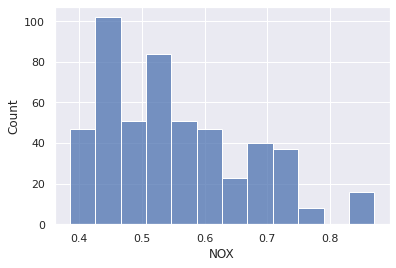

In [11]:
sns.histplot(data = df, x = 'NOX')

Produce a boxplot of the nitric oxides concentration.

<AxesSubplot: xlabel='NOX'>

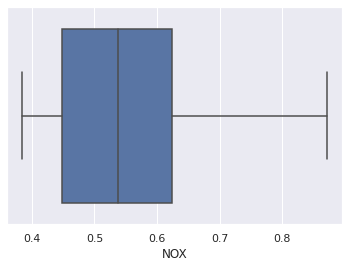

In [12]:
sns.boxplot(data = df, x = 'NOX')

Produce a correlation matrix of all the features:

<AxesSubplot: >

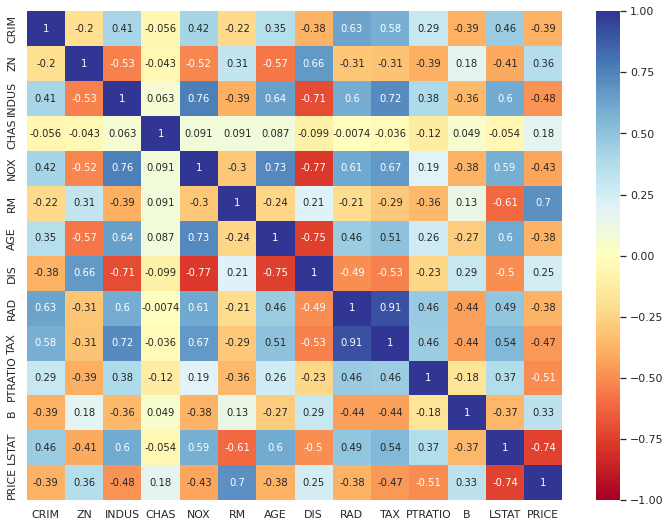

In [13]:
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "RdYlBu", annot=True)

We speculate that row number 4 (CHAS) is an outlier, because it has almost zero correlation with everything else

In [14]:
def get_corr_features(df, n):
    abs_df = abs(df.corr())
    max_corr = abs_df.stack().nlargest(len(abs_df) + 2*n)
    return dict(zip(list(max_corr[len(abs_df):].index)[::2], list(max_corr[len(abs_df):].values)[::2]))

In [16]:
corr_features = get_corr_features(df, 2)
corr_features

{('RAD', 'TAX'): 0.9102281885331865, ('NOX', 'DIS'): 0.7692301132258282}

We can find the correlative features:

Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

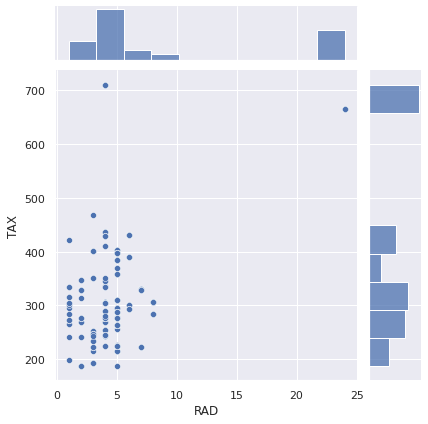

In [20]:
sns.jointplot(data=df, x=list(corr_features.keys())[0][0], y=list(corr_features.keys())[0][1])

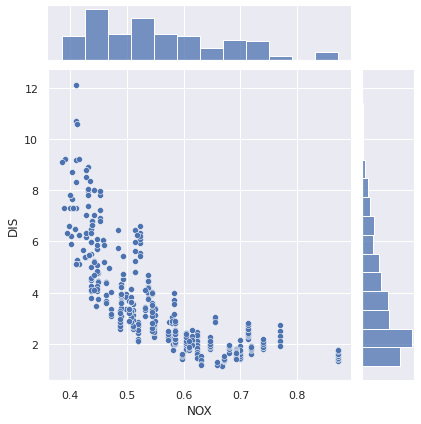

In [21]:
sns.jointplot(data=df, x=list(corr_features.keys())[1][0], y=list(corr_features.keys())[1][1])

Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

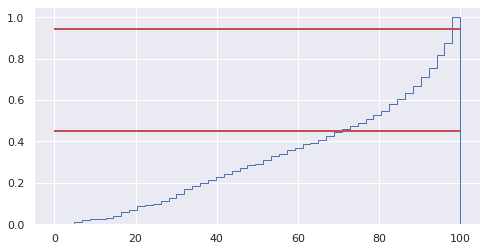

In [22]:
quantiles = df['AGE'].quantile([0.25,0.75])
q1 = quantiles.values[0]
q3 = quantiles.values[1]

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df['AGE'], 50, density=True, histtype='step', cumulative=True, label='Empirical')
ax.hlines(y=q1/100, xmin=0, xmax=100, linewidth=2, color='r')
ax.hlines(y=q3/100, xmin=0, xmax=100, linewidth=2, color='r')

Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

Identify and report 2 “interesting” trends in the data. No need to provide statistical confide

First interesting point: features have a correlation to the target!

To test this, We will test the mean_squared_error of random forest model VS mean of random guess 20 times.

random guess:

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop('PRICE', axis = 1), df['PRICE'], test_size=0.33, random_state=42)
rg_mse = np.mean([mean_squared_error(y_test, np.random.randint(0, max(df['PRICE']), len(X_test))) for i in range(20)])
rg_mse

292.37227544910183

random forest:

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf.predict(X_test))
rf_mse

10.567597808383237

In [25]:
rg_mse/rf_mse

27.66686249330609

It can see that the correlation is 29 times higher than an average random guess

The second interesting point: Half the correlation to the target is mainly based on only two features only!

In [26]:
fi = pd.DataFrame(dict(zip(list(X_test.columns),list(rf.feature_importances_))), index=['feature_importances']).T.sort_values(by = 'feature_importances')
fi

,feature_importances
CHAS,0.000738
ZN,0.002868
RAD,0.004863
INDUS,0.008036
TAX,0.009562
NOX,0.010829
B,0.011743
AGE,0.015725
PTRATIO,0.016447
CRIM,0.035342


In [27]:
list_most_feature_importances = list(fi.loc[fi['feature_importances']>0.1].index)
list_most_feature_importances

['RM', 'LSTAT']

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train[list_most_feature_importances], y_train)
rf_fi_mse = mean_squared_error(y_test, rf.predict(X_test[list_most_feature_importances]))
rf_fi_mse

21.2285401497006

In [29]:
rg_mse/rf_fi_mse

13.772603927888342

It can see that the correlation is 14 times higher than an average random guess

Using all the features resulted in a double result in only two

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

If the random variables X, Y, and Z are not independent, then the number of parameters that define their joint distribution is generally less than the product of the number of parameters that define the individual distributions of each random variable. This is because the joint distribution of non-independent random variables takes into account the relationship between the variables, which reduces the number of parameters needed to fully define their joint distribution.

The exact number of parameters that define the joint distribution of non-independent random variables X, Y, and Z would depend on the specific nature of their relationship. In general, though, the number of parameters would be less than the product of the number of parameters for the individual distributions.

Therefore we expect a result that will be less than

$n*m*k=64 < parameters$

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

If the random variables X, Y, and Z are independent, then the number of parameters that define their joint distribution is equal to the product of the number of parameters that define the individual distributions of each random variable. This is because the joint distribution of independent random variables is simply the product of their individual distributions.

The number of parameters that define the joint distribution of three discrete random variables depends on the number of possible outcomes for each random variable. For example, if random variables X and Y have n and m possible outcomes, respectively, and random variable Z has k possible outcomes, then the joint distribution of X, Y, and Z would have n * m * k possible outcomes. In this case, where n, m, and k are all specified as 4, the joint distribution of X, Y, and Z would have 4 * 4 * 4 = 64 possible outcomes. This means that the joint distribution of X, Y, and Z would be defined by 64 parameters.

In [30]:
def num_joint_dist_params(n, m, k):
    return n * m * k

num_joint_dist_params(4, 4, 4)

64

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

If the random variables X and Y are conditionally independent given Z, then the number of parameters that define their joint distribution is equal to the product of the number of parameters that define the individual distributions of X and Y, plus the number of parameters that define the distribution of Z. This is because the joint distribution of X and Y given Z is simply the product of their individual distributions, plus the distribution of Z.

For example, if X, Y, and Z each have 4 possible outcomes, then their individual distributions would be defined by 4 parameters each. This means that the joint distribution of X and Y given Z would be defined by 4 * 4 + 4 = 20 parameters.

To put this into the context of a Python function, the num_joint_dist_params function from the previous answer could be modified like this to take into account the conditional independence of X and Y given Z:

In [31]:
def num_joint_dist_params_x_y_independent_given_z(n, m, k):
    # Calculate the number of parameters for the joint distribution of X and Y given Z
    # as the product of the number of parameters for the individual distributions of X and Y
    # plus the number of parameters for the distribution of Z
    return n * n + k

In [32]:
num_joint_dist_params_x_y_independent_given_z(4, 4, 4)

20

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

It is not possible for random variables U and V to be both unconditionally independent and not conditionally independent given W. This is because unconditional independence is a stronger condition than conditional independence, meaning that if two random variables are unconditionally independent, then they must also be conditionally independent given any other random variable.

Here is an example of a joint distribution of U, V, and W where U and V are conditionally independent given W, but not unconditionally independent:


Random variable U is standard normally distributed with a mean of 0 and a standard deviation of 1.

Random variable V is also standard normally distributed with a mean of 0 and a standard deviation of 1.

Random variable W is a coin with two possible outcomes: heads and tails.


In this case, the joint distribution of U, V, and W can be defined as follows:

If W is heads, then the joint distribution of U and V is the same as the individual distributions of U and V, which is standard normal with a mean of 0 and a standard deviation of 1.
If W is tails, then the joint distribution of U and V is defined by the following equation:
U = V
This means that if W is tails, then U and V are perfectly correlated, which means that they are not independent. However, if W is heads, then U and V are independent, since their joint distribution is the same as their individual distributions.

Therefore, in this example, U and V are conditionally independent given W, since their independence depends on the value of W. However, they are not unconditionally independent, since they are not independent in all cases.

In [33]:
import numpy as np

def joint_dist(u, v, w):
    # Check if W is heads or tails
    if w == "heads":
        # If W is heads, return the joint distribution of U and V
        # as the product of their individual distributions
        return np.random.normal(0, 1) * np.random.normal(0, 1)
    elif w == "tails":
        # If W is tails, return the joint distribution of U and V
        # as U = V
        return u

In [34]:
joint_dist(0.5, 0.7, "heads")

-0.051584236939728016

In [35]:
joint_dist(0.5, 0.7, "tails")

0.5

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

In [36]:
u = 75000
std = 37500
dist = stats.norm(loc=u, scale=std)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [37]:
dist.cdf(50000)

0.2524925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [38]:
dist.cdf(65000) - dist.cdf(45000)

0.18300751188062842

#### 4.C
What percent of people earn more than 85,000 RCU?

In [39]:
1 - dist.cdf(85000)

0.3948629104640251

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [40]:
int((1 - dist.cdf(140000))*1000)

41

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [41]:
def H(n):
    H = 0
    for i in range(1, n+1):
        H = H + 1/i
    return H

In [42]:
def exp_Tn(N):
    return N*H(N)

In [43]:
exp_Tn(100)

518.737751763962

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Since coupon collection are independent, we have:  
$$V(T_{N})=V(X_{1}+X_{2}+...+X_{n})=\sum_{i=0}^{N}V(X_{i})$$  
$$X_{i}\sim G(p), V(X_{i})=\frac{1-p}{p^2},p=\frac{N-i+1}{N}$$  

In [44]:
def var_Tn(N):
    var = 0
    for i in range(1, N+1):
        p=(N-i+1)/N
        var = var + (1-p)/(p)**2
    return var

In [45]:
var_Tn(56)

4844.767973767466

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$